In [1]:
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(pheatmap))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(ggtree))
suppressMessages(library(hash))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(ggalluvial))
suppressMessages(library(grid))
suppressMessages(library(ggrepel))
suppressMessages(library(ggdark))
suppressMessages(library(tidyverse))
suppressMessages(library(ggrastr))
suppressMessages(library(ggpubr))
suppressMessages(library(readxl))
suppressMessages(library(ggsci))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))
suppressMessages(library(aplot))
suppressMessages(library(Seurat))
suppressMessages(library(gridExtra))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# Figure 1B

In [25]:
dat=as.data.frame(read_xls("GF_SPF_phenotype_statistic.xls",col_types = c("guess")))

In [31]:
for(i in colnames(dat)[4:9]){
    print(i)
    dat[,i] <- as.numeric(dat[,i])
}

[1] "small_int"


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "large_int"


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "cecum"
[1] "liver"


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "thymus"


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "spleen"


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [80]:
plst <- list()
for(i in colnames(dat)[c(3:7,9,8)]){
    print(i)
    data <- na.omit(dat[,c(colnames(dat)[2],i)])
    y_max <- max(data[,i])
    plst[[i]] <- ggviolin(data, x = "mice", y = i ,fill = "mice", palette =c("#B33E52", "darkgray"),
            dd = "boxplot")+stat_compare_means(method = "wilcox.test",
                                             ref.group = "SPF",
                                              label = "p.signif",size = 5) + 
        theme(axis.text.y = element_text(size = 20,margin  = margin(0,10,0,0)),
            axis.text.x = element_text(size = 20,margin  = margin(10,0,0,0)),
            axis.title.x= element_blank(),
            axis.title.y= element_text(size = 30,margin  = margin(0,15,0,0)),
            legend.text = element_text(size = 18),
            legend.title = element_text(size = 25))
} 

[1] "weight"
[1] "small_int"
[1] "large_int"
[1] "cecum"
[1] "liver"
[1] "spleen"
[1] "thymus"


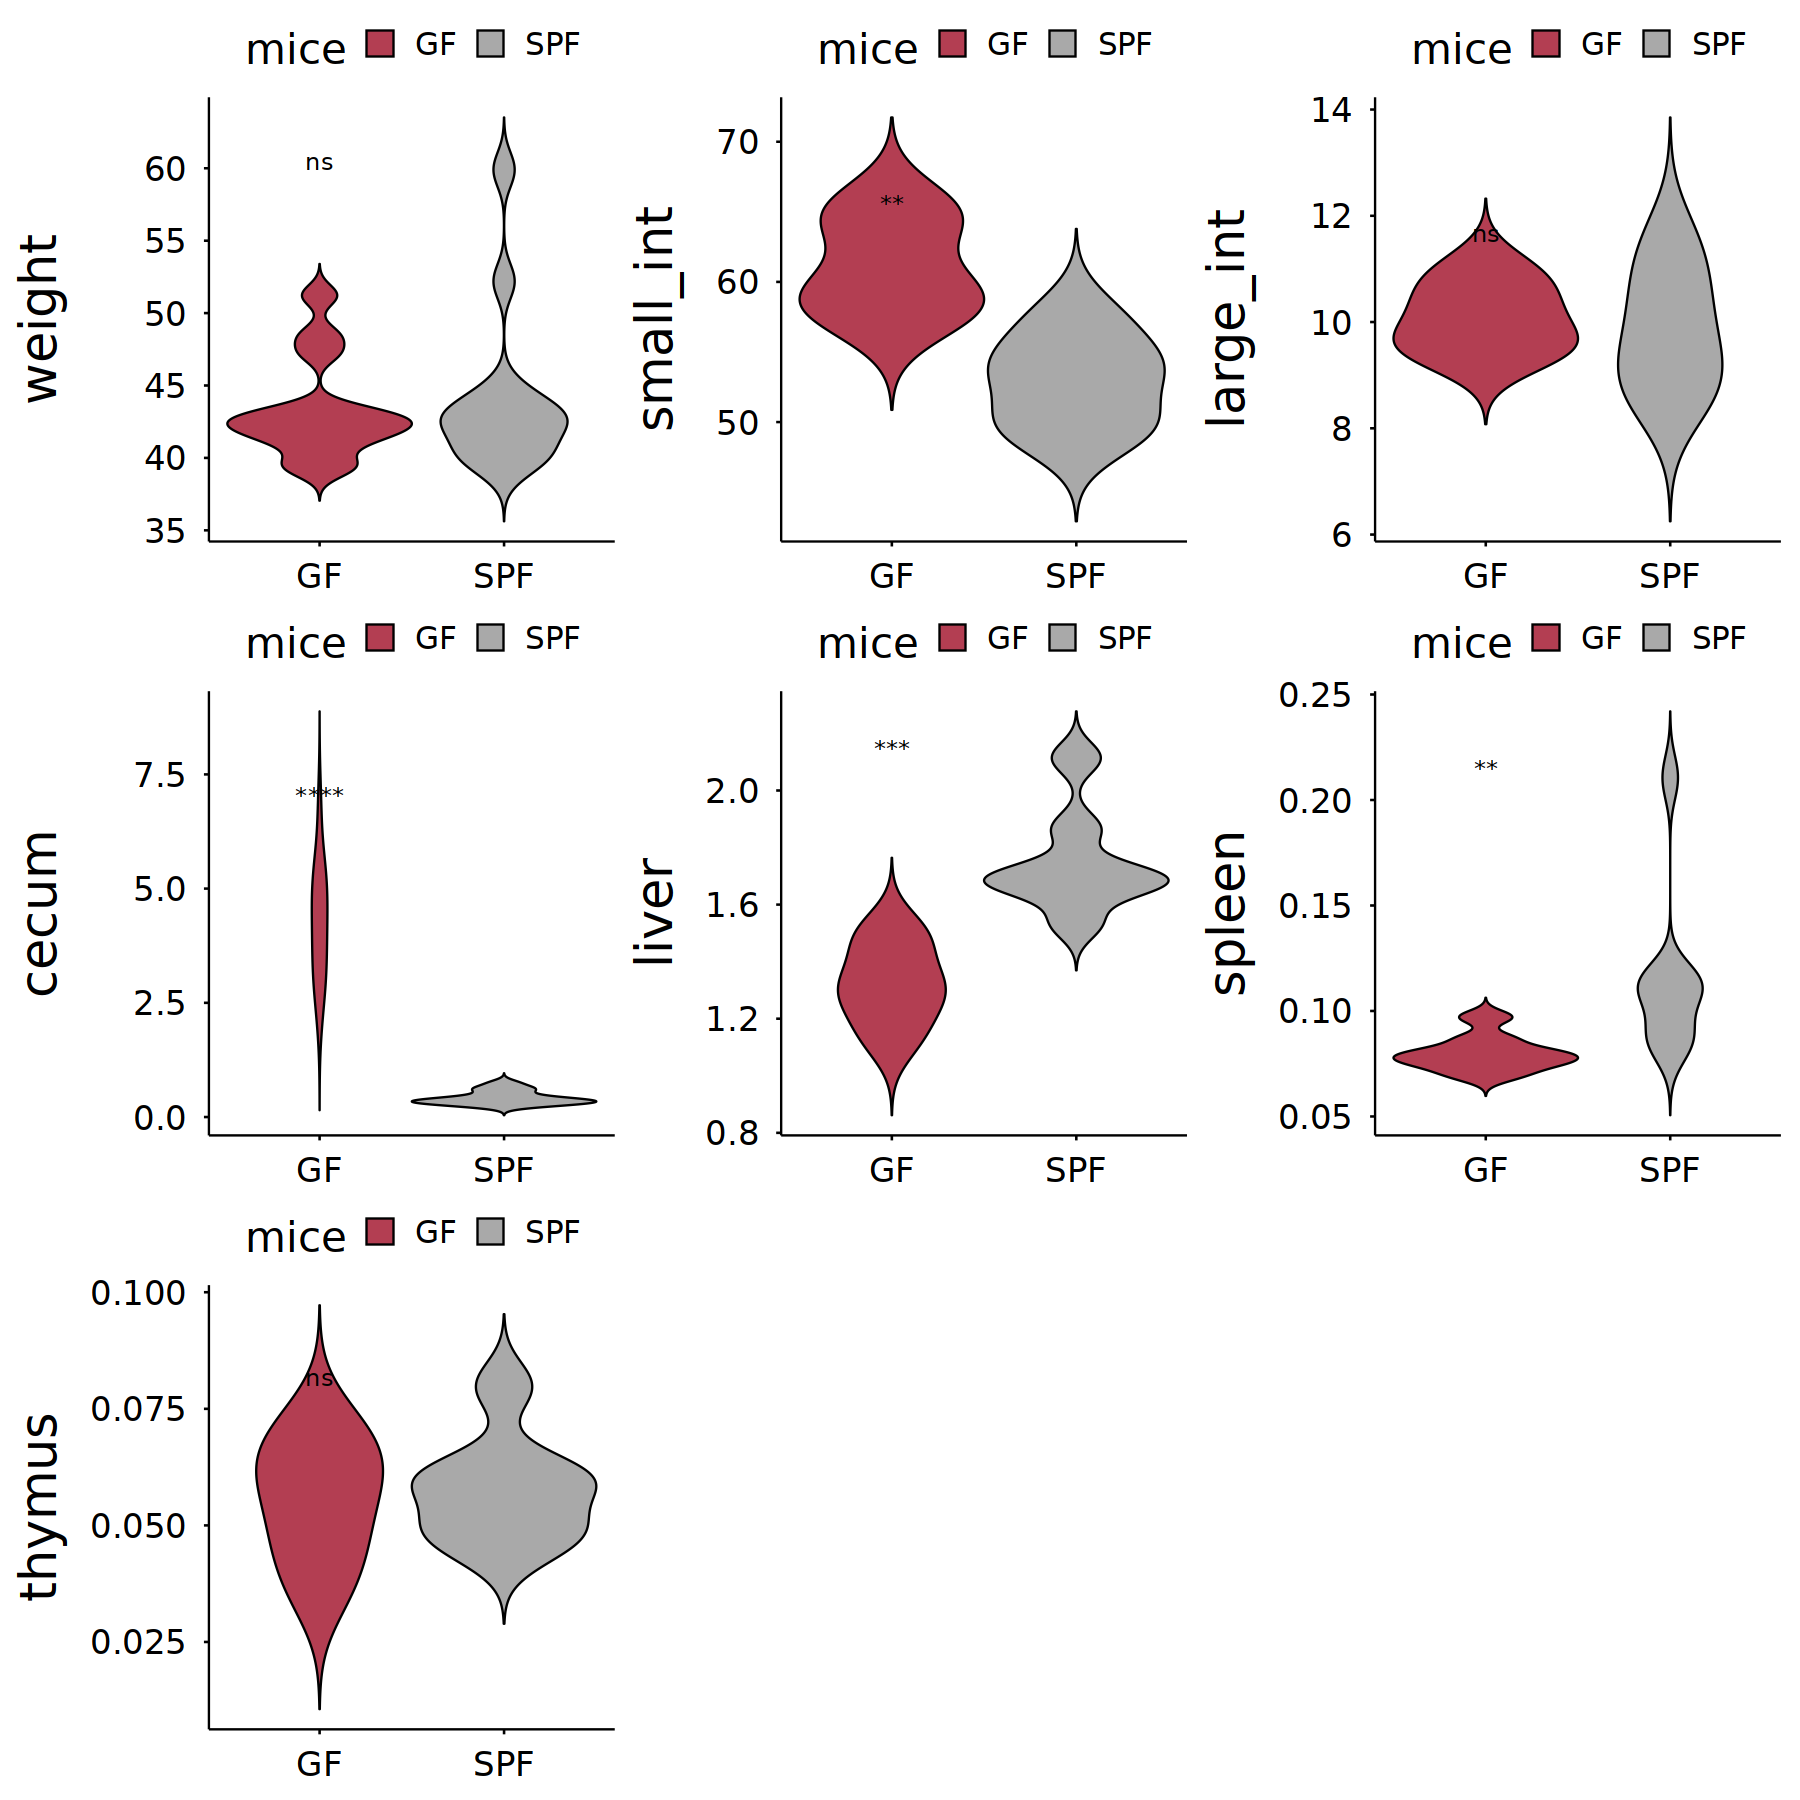

In [81]:
options(repr.plot.width = 15,repr.plot.height= 15)
p <-  wrap_plots(plst,ncol=3)
p

# Figure 1C 

In [33]:
DimPlot_custom <- function(object,vars,clusters,mycolor,label.size,title = NULL,legend = NULL){
        data <- data.frame(x = 0,y =0)
        p.arrow <- ggplot(data = data,aes(x = x,y = y)) + geom_point(size=2, alpha=1) + 
            geom_segment(aes(,x = x , y = y , xend = x +4, yend = y ), colour = "black",
                     size=0.5,arrow = arrow(length = unit(0.5,"cm")))+ 
            geom_segment(aes(x = x  , y = y , xend = x , yend =y + 4), colour = "black", 
                     size=0.5,arrow = arrow(length = unit(0.5,"cm"))) +
            annotate("text", x = data$x+2, y =data$y-1, label = "tSNE_1", color="black",
                 size = 4,fontface="bold" ) + 
            annotate("text", x = data$x-1, y =data$y + 2, label = "tSNE_2",color="black",
                 size = 4, fontface="bold" ,angle=90) + theme_bw()+
            theme(plot.margin=unit(c(0.1, 0.1, 0.1, 0.1), "inches"),legend.title=element_blank()) +
                theme(panel.grid.major = element_blank(), #主网格线
                panel.grid.minor = element_blank(), #次网格线
                panel.border = element_blank(), #边框
                axis.title = element_blank(),  #轴标题
                axis.text = element_blank(), # 文本
                axis.ticks = element_blank())
        plot.data <- FetchData(object,vars = vars)
        plot.data$clusters <- as.character(plot.data$clusters) # !!!
        plot.data <- plot.data %>% mutate(celltype2 = paste(clusters,celltypes,sep = " "))
        plot.data$celltype2 <- factor(plot.data$celltype2,levels = clusters$celltype)
        centers <- plot.data %>% group_by(clusters) %>% summarise(tSNE_1 = median(tSNE_1),tSNE_2 = median(tSNE_2)) %>%
                as.data.frame() 
        theme_self <- theme(plot.margin=unit(c(0.1, 0.1, 0.1, 0.1), "inches"),legend.title=element_blank()) +
                   theme(panel.grid.major = element_blank(), #主网格线
                   panel.grid.minor = element_blank(), #次网格线
                   panel.border = element_blank(), #边框
                   axis.title = element_blank(),  #轴标题
                   axis.text = element_blank(), # 文本
                   axis.ticks = element_blank(),plot.title = element_text(size =25,hjust = 0.5,
                                                                          family = "Times",face = "bold"))
        if(is.null(legend)){
            theme_self <-theme_self + theme(legend.position = "none")
        } else {
            theme_self <- theme_self + theme(legend.text=element_text(colour="black",size=12),legend.position="right",
                          plot.title=element_text(hjust=0.5))
        }
        p <- ggplot(data=plot.data,aes(x=tSNE_1, y=tSNE_2))+
            geom_point_rast(alpha=0.2, size=0.0000000001,aes(colour=celltype2)) +
            guides(colour=guide_legend(override.aes=list(size=5,alpha = 1)))+
            scale_color_manual(values=mycolor)+
            theme_bw()+
            labs(x= "tSNE_1",y="tSNE_2",title= title) + theme_self +  
             geom_point(data=centers, mapping=aes(x=tSNE_1, y=tSNE_2), size=0, alpha=0) + 
             geom_text(data=centers, mapping=aes(label=clusters), size=label.size, fontface="plain")
        p <- p + inset_element(p.arrow,left = 0,bottom = 0,right = 0.2,top = 0.2,align_to= "full",on_top = TRUE)
        return(p)                                                        
}

In [2]:
All4 <- readRDS("whole_final_annotation.rds")

In [4]:
clusters <- All4@meta.data %>% select(clusters,celltypes) %>% arrange(clusters) %>% 
    mutate(celltype = paste(clusters,celltypes,sep = " "))
Annot <- clusters[!duplicated(clusters),]

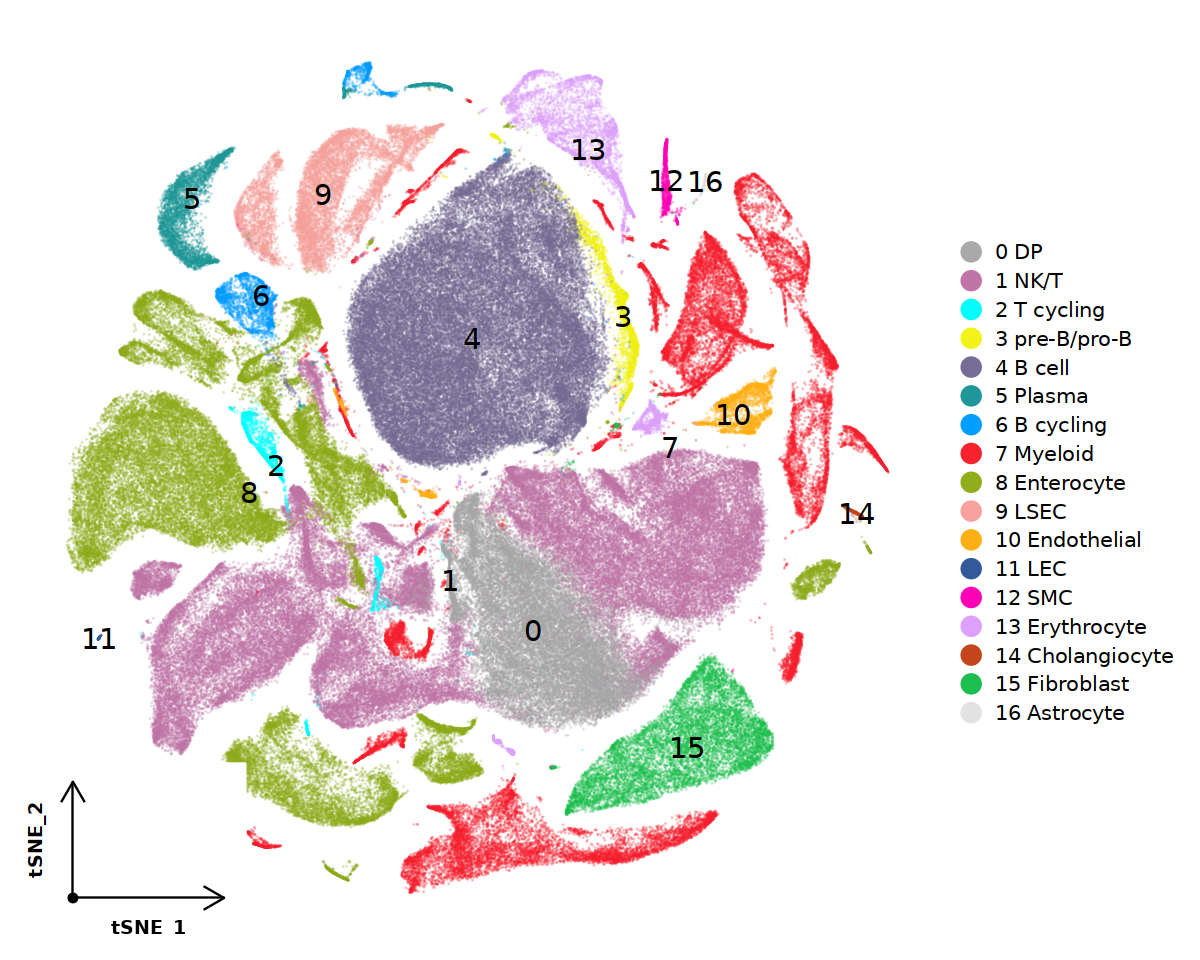

In [34]:
options(repr.plot.width = 10,repr.plot.height= 8)
mycolor <- c("darkgray","#C075A6","cyan","#F2F318","#766C95","#1F9698","#009FFF",
             "#F6222E","#90AD1C","#F8A19F","#FEAF16","#325A9B","#FF00B6","#DEA0FD",
             "#C4451C","#1CBE4F","#E2E2E2","#F7E1A0","#B3823E")
DimPlot_custom(object = All4,vars = c("tSNE_1","tSNE_2","clusters","celltypes"),clusters = Annot,
                mycolor = mycolor,label.size = 6,legend = TRUE)

# Figure 1D

In [5]:
GetMergeTable <- function(object,var){
    print(object)
    whole <- as.data.frame.array(table(object@meta.data$celltypes,object@meta.data$mice))
    print(whole)
    Idents(object) <- var
    for( i in unique(object@meta.data[,var])){
        print(i)
        subObj <- subset(object, idents = i)
        tissue_table <- as.data.frame.array(table(subObj@meta.data$celltypes,subObj@meta.data$mice))
        tissue_prefix <- rep(i,2)
        table_newnames <- paste(colnames(tissue_table),tissue_prefix,sep = "_")
        colnames(tissue_table) <- table_newnames  # ?
        whole <- cbind(whole,tissue_table)
    }
    return(whole)
}
CellRadioNumPlot <- function(object,var,tissue_levels,mycolor = NULL,levels = NULL){
    CellNum2 <- GetMergeTable(object,var)
    CellNum2 <- CellNum2[,3:18]
    # Radio #
    CellNum.p <- as.data.frame(proportions(as.matrix(CellNum2),margin = 2) * 100)
    CellNum.p$celltypes <- rownames(CellNum.p)
    CellNum.pt <- melt(CellNum.p,id.vars= "celltypes")
    colnames(CellNum.pt) <- c("celltypes","variable","Composition")
    # cell num #
    rownames(CellNum2) <- NULL
    Tissue_CellNum <- as.data.frame(colSums(CellNum2))
    Tissue_CellNum$tissue <- rownames(Tissue_CellNum)
    colnames(Tissue_CellNum) <- c('num','tissue')
    if(!is.null(levels)){
            CellNum.pt$celltypes <- factor(CellNum.pt$celltypes,levels = levels)  # celltype  levels color 
    } else {
        print('No level!')
    }
    CellNum.pt$variable <- factor(CellNum.pt$variable,levels = tissue_levels) # tissue levels x axis #
    Tissue_CellNum$tissue <- factor(Tissue_CellNum$tissue,levels = tissue_levels)
    if(is.null(mycolor)){
        nclu <- length(rownames(CellNum.p))
        mycolor = colorRampPalette(brewer.pal(9, "Set1"))(nclu)
    } else {
        print(mycolor)
     }
    
    # Radio #
    p1 <- ggplot(CellNum.pt,aes(x = variable,y = Composition,fill= celltypes,stratum = celltypes,alluvium = celltypes)) + 
            geom_col(width = 0.5,color= "black") +  coord_flip() +
            geom_flow(width = 0.5,alpha = 0.4, knot.pos=0.5) + theme_classic() + labs(x = " " , y = "Composition (%)") +  
    scale_fill_manual(values=mycolor) + theme(
            axis.text.y = element_text(size = 20,face = "bold",margin  = margin(0,10,0,0)),
            axis.text.x = element_text(size = 20,face = "bold",margin  = margin(10,0,0,0)),
            axis.title.x= element_text(size = 30,face = "bold",margin  = margin(15,0,0,0)),
            axis.title.y= element_text(size = 30,face = "bold",margin  = margin(0,15,0,0)),
             axis.line = element_line(linetype = 1,color= "black",size = 1),
            legend.text = element_text(size = 18,face = "bold"),
             legend.title = element_text(size = 25,face = "bold"),
           axis.ticks  = element_line(color = "black",size = 1,lineend = 2))
    # cell num #
    p2 <- ggplot(Tissue_CellNum,aes(x = tissue, y = num)) +  
                geom_bar(stat = "identity",position = "stack",width = 0.5) +
                theme_classic() + labs(x = "" , y = "Cell Number") +
                scale_fill_manual(values=mycolor) + theme(
                    axis.text.y = element_blank(),
                    axis.text.x = element_text(size = 20,face = "bold", # family = "Times"
                                           margin = margin(10,0,0,0)),
                    axis.title.x = element_text(margin  = margin(15,0,0,0)),
                    axis.title.y = element_text(margin  = margin(0,15,0,0)),
                    axis.title= element_text(size = 30,face = "bold"), # ,family = "Times"
                    axis.line = element_line(linetype = 1,color= "black",size = 1),
                    legend.text = element_text(size = 18 ,face = "bold"), # ,family = "Times"
                    legend.title = element_text(size = 25,face = "bold"),# family = "Times"
                    axis.ticks.y = element_blank(),
                    axis.ticks.x = element_line(color = "black",size = 1,lineend = 2)) + coord_flip() +
                            scale_y_continuous(breaks = c(0,10000,20000,30000),
                           labels = c("0","10k","20k","30k"))
    p.me <- p1 + p2 + plot_layout(width = c(3,1),guides = 'collect')
    return(p.me)
} 

In [6]:
mycolor <- c("darkgray","#C075A6","cyan","#F2F318","#766C95","#1F9698","#009FFF",
             "#F6222E","#90AD1C","#F8A19F","#FEAF16","#325A9B","#FF00B6","#DEA0FD",
             "#C4451C","#1CBE4F","#E2E2E2","#F7E1A0","#B3823E")

In [7]:
immune <- subset(All4,idents = c(0,1,2,3,4,5,6,7))
Idents(immune) <- "celltypes"
immune@meta.data$celltypes <- Idents(immune)
Annot_immnue <- Annot[1:8,]
Annot_immnue$celltypes <- as.vector(Annot_immnue$celltypes)
tissue_levels <- c("SPF_cecum","GF_cecum","SPF_colon","GF_colon",
                   "SPF_ileum","GF_ileum", "SPF_liver","GF_liver",
                   "SPF_thymus","GF_thymus","SPF_spleen","GF_spleen",
                   "SPF_bm","GF_bm","SPF_blood","GF_blood")                 
p <- CellRadioNumPlot(object = immune,var = "tissue",mycolor = mycolor,
       tissue_levels = tissue_levels,levels = Annot_immnue$celltypes)  
date()

An object of class Seurat 
32886 features across 191425 samples within 2 assays 
Active assay: RNA (30886 features, 0 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne
               GF   SPF
NK/T        31250 34206
Myeloid     17320 15841
T cycling    1127  1597
B cycling     916  1977
pre-B/pro-B  1767  1682
Plasma        389  4497
DP          10242 15343
B cell      18047 35224
[1] "bm"
[1] "liver"
[1] "blood"
[1] "spleen"
[1] "cecum"
[1] "ileum"
[1] "colon"
[1] "thymus"
 [1] "darkgray" "#C075A6"  "cyan"     "#F2F318"  "#766C95"  "#1F9698" 
 [7] "#009FFF"  "#F6222E"  "#90AD1C"  "#F8A19F"  "#FEAF16"  "#325A9B" 
[13] "#FF00B6"  "#DEA0FD"  "#C4451C"  "#1CBE4F"  "#E2E2E2"  "#F7E1A0" 
[19] "#B3823E" 


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


[1] "Thu Jan  9 14:21:44 2025"

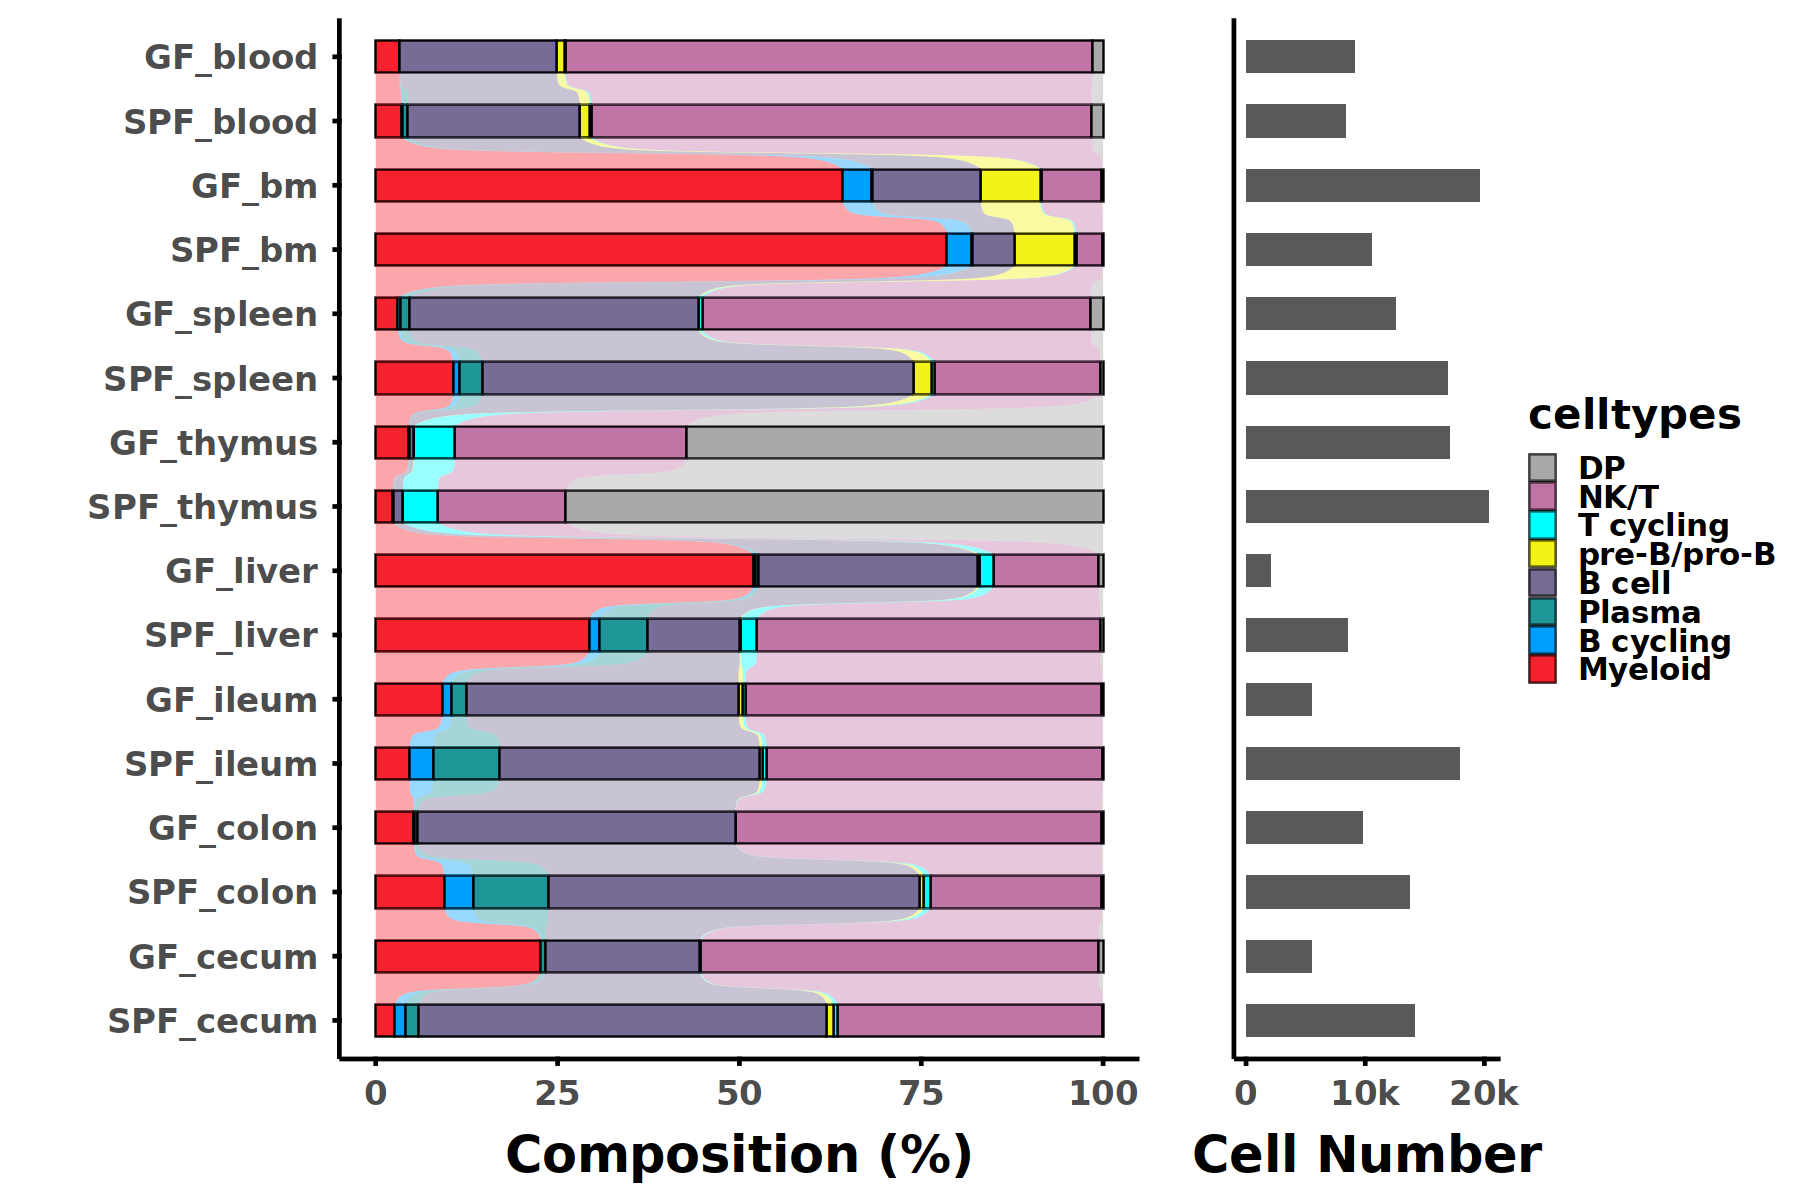

In [19]:
options(repr.plot.width = 15,repr.plot.height= 10)
p